In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
ss = pd.read_csv("/content/seguro-saude.csv", index_col=False, header=None, squeeze=True);

In [36]:
ss.columns = ss.iloc[0]
ss = ss.drop(0)
ss.head()

,idade,sexo,indice_massa_corporal,n_dependentes,fumante,regiao,valor_seguro
1,19,female,27.9,0,yes,southwest,16884.924
2,18,male,33.77,1,no,southeast,1725.5523
3,28,male,33,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.47061
5,32,male,28.88,0,no,northwest,3866.8552


In [38]:
ss['idade'] = ss['idade'].astype(str).astype(int)
ss['indice_massa_corporal'] = ss['indice_massa_corporal'].astype(str).astype(float)
ss['n_dependentes'] = ss['n_dependentes'].astype(str).astype(int)
ss['regiao'] = ss['regiao'].astype(str)
ss['valor_seguro'] = ss['valor_seguro'].astype(str).astype(float)

ss['fumante'] = ss['fumante'].str.replace('yes','1')
ss['fumante'] = ss['fumante'].str.replace('no','0')
ss['fumante'] = ss['fumante'].astype(int)

ss.dtypes

0
idade                      int64
sexo                      object
indice_massa_corporal    float64
n_dependentes              int64
fumante                    int64
regiao                    object
valor_seguro             float64
dtype: object

## Questão 1

**Observando estatísticas gerais**

In [37]:
ss.describe()

,idade,sexo,indice_massa_corporal,n_dependentes,fumante,regiao,valor_seguro
count,1338,1338,1338,1338,1338,1338,1338
unique,47,2,548,6,2,4,1337
top,18,male,32.3,0,no,southeast,1639.5631
freq,69,676,13,574,1064,364,2


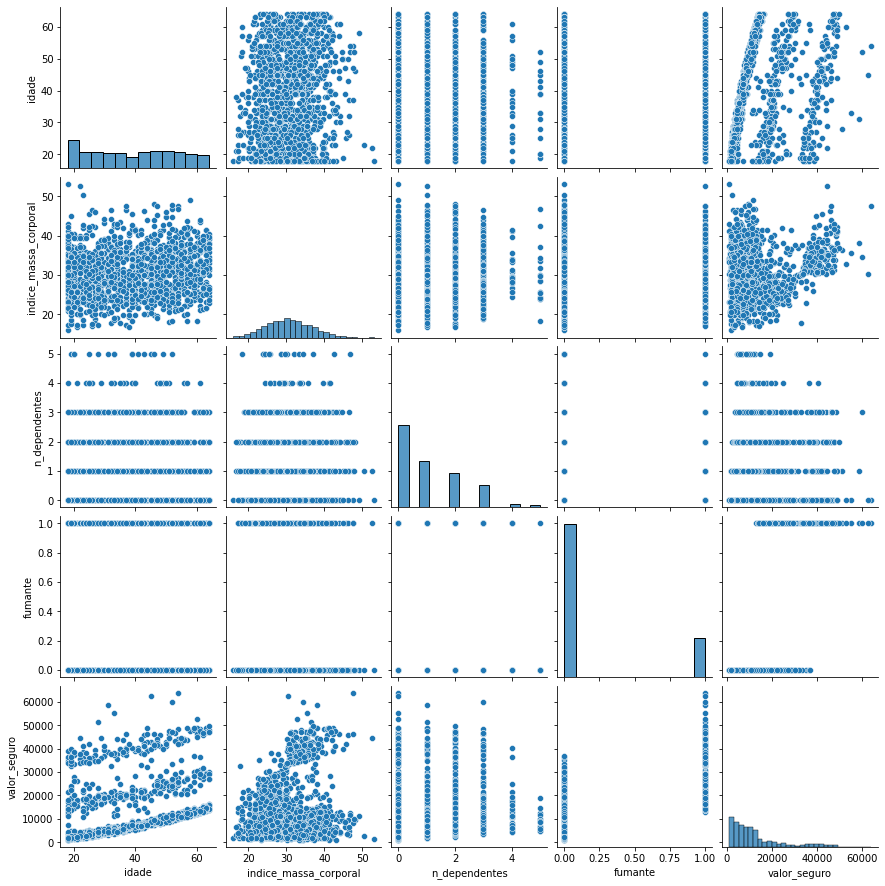

In [71]:
sns.pairplot(ss)

**Observação do parâmetro Idade apenas**

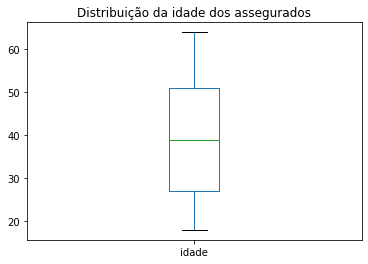

In [18]:
ss['idade'].plot(kind='box')
plt.title("Distribuição da idade dos assegurados")
plt.show()

**Observação do parâmetro valor do seguro apenas**

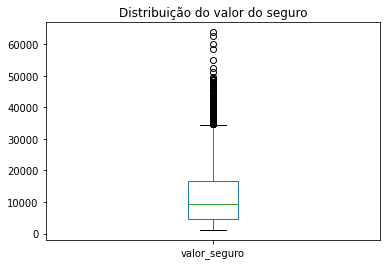

In [19]:
ss['valor_seguro'].plot(kind='box')
plt.title("Distribuição do valor do seguro")
plt.show()

**Observando valor do seguro por região**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Valor do Seguro')

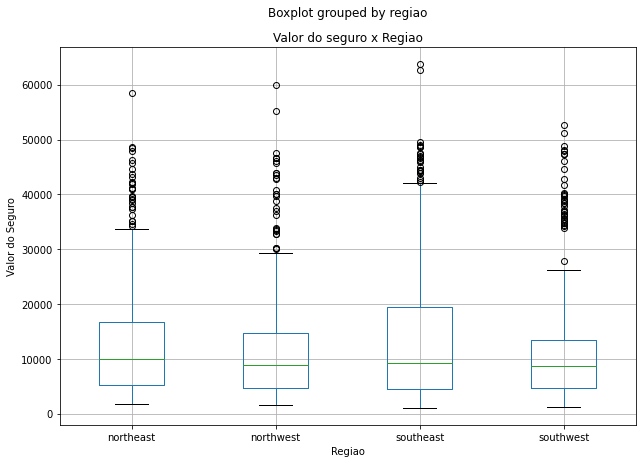

In [70]:
graph = ss.boxplot(column=['valor_seguro'], by=['regiao'],figsize=[10,7])
graph.set_title("Valor do seguro x Regiao")
graph.set_xlabel("Regiao")
graph.set_ylabel("Valor do Seguro")

**Valor do seguro por condição de fumante ou não fumante**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[Text(0, 0, 'Não Fumante'), Text(0, 0, 'Fumante')]

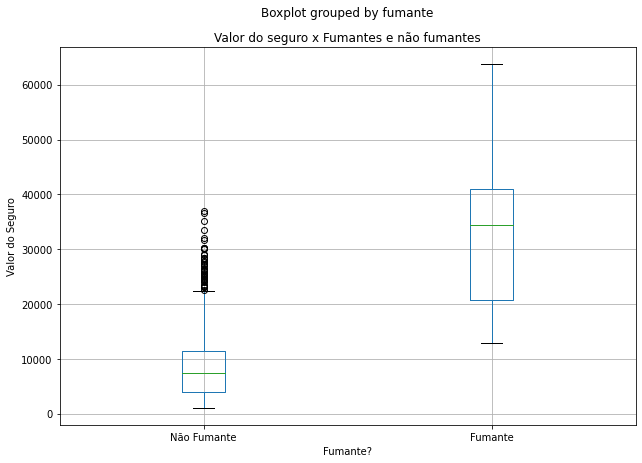

In [46]:
graph = ss.boxplot(column=['valor_seguro'], by=['fumante'],figsize=[10,7])
graph.set_title("Valor do seguro x Fumantes e não fumantes")
graph.set_xlabel("Fumante?")
graph.set_ylabel("Valor do Seguro")
graph.set_xticklabels(["Não Fumante", "Fumante"])

**Valor do seguro por idade**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Valor do Seguro')

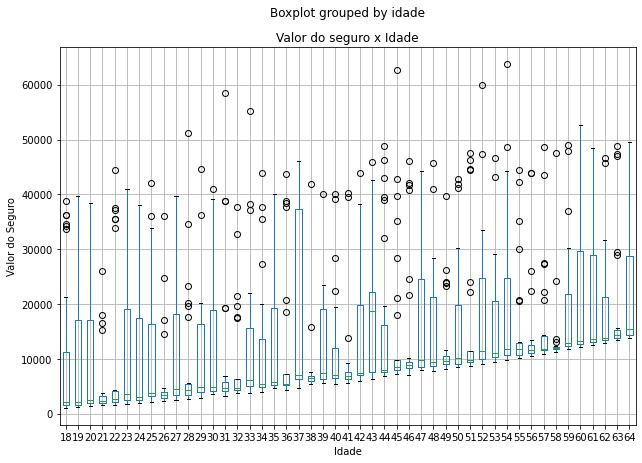

In [56]:
graph = ss.boxplot(column=['valor_seguro'], by=['idade'],figsize=[10,7])
graph.set_title("Valor do seguro x Idade")
graph.set_xlabel("Idade")
graph.set_ylabel("Valor do Seguro")

**Valor do seguro por condição de fumante e idade**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Valor do Seguro')

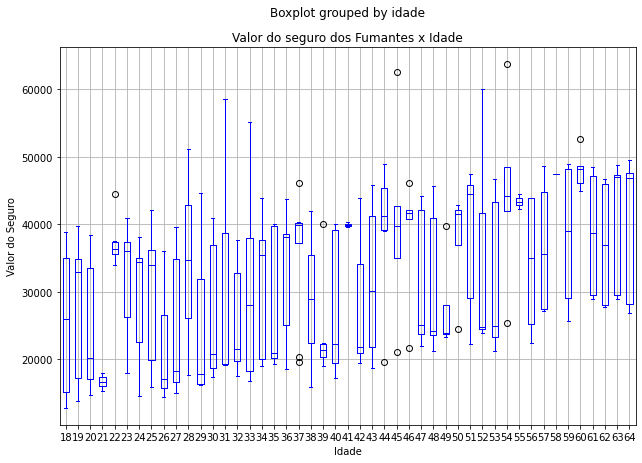

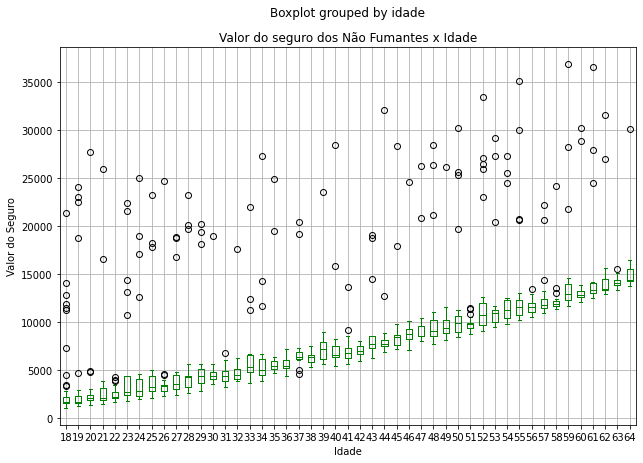

In [58]:
graph = ss[ss['fumante'] == 1].boxplot(column=['valor_seguro'], by=['idade'],figsize=[10,7], color="blue")
graph.set_title("Valor do seguro dos Fumantes x Idade")
graph.set_xlabel("Idade")
graph.set_ylabel("Valor do Seguro")
graph = ss[ss['fumante'] == 0].boxplot(column=['valor_seguro'], by=['idade'],figsize=[10,7], color="green")
graph.set_title("Valor do seguro dos Não Fumantes x Idade")
graph.set_xlabel("Idade")
graph.set_ylabel("Valor do Seguro")

**Resposta final**

**R:** Nessa primeira parte da análise dos dados, foi possível perceber que não há grande variação entre as regiões no valor do seguro. Além disso, percebemos que o fator ser fumante faz com que os valores do seguro sejam mais variados do que para os não fumantes, assim como consideravelmente mais altos. Além disso, é possível perceber claramente que com o aumento da idade o valor médio e o valor dos seguros mais baratos aumenta consistentemente para todos, sejam eles fumantes ou não.

## Questão 2

In [105]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas.util.testing as tm

In [110]:
ss['regiao'] = ss['regiao'].str.replace('southwest','0')
ss['regiao'] = ss['regiao'].str.replace('southeast','1')
ss['regiao'] = ss['regiao'].str.replace('northwest','2')
ss['regiao'] = ss['regiao'].str.replace('northeast','3')
ss['regiao'] = ss['regiao'].astype(int)

ss['sexo'] = ss['sexo'].str.replace('female','1')
ss['sexo'] = ss['sexo'].str.replace('male','0')
ss['sexo'] = ss['sexo'].astype(int)

**Regressão Linear com variáveis individuais**

In [106]:
X = ss.idade
Y = ss.valor_seguro
lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),Y)
print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1),Y))

Coeficiente estimado:  [257.72261867]
R2 (score):  0.08940589967885804


In [107]:
X = ss.fumante
Y = ss.valor_seguro
lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),Y)
print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1),Y))

Coeficiente estimado:  [23615.96353368]
R2 (score):  0.6197648148218988


In [108]:
X = ss.n_dependentes
Y = ss.valor_seguro
lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),Y)
print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1),Y))

Coeficiente estimado:  [683.08938248]
R2 (score):  0.004623758854459203


In [109]:
X = ss.indice_massa_corporal
Y = ss.valor_seguro
lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),Y)
print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1),Y))

Coeficiente estimado:  [393.8730308]
R2 (score):  0.03933913991786264


In [111]:
X = ss.indice_massa_corporal
Y = ss.sexo
lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),Y)
print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1),Y))

Coeficiente estimado:  [-0.00380326]
R2 (score):  0.0021502836122612168


In [112]:
X = ss.indice_massa_corporal
Y = ss.regiao
lm = LinearRegression()
lm.fit(X.values.reshape(-1,1),Y)
print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1),Y))

Coeficiente estimado:  [-0.02854818]
R2 (score):  0.024826996626397757


Podemos observar que, individualmente, a variável que indica se a pessoa é fumante ou não provê um ajuste muito mais positivo do que as demais variáveis.

**Regressão Linear com múltiplas variáveis**

In [115]:
X = ss.drop('valor_seguro',axis = 1)
Y = ss.valor_seguro
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           valor_seguro   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:22:34   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.301e+

In [116]:
X = ss.drop('valor_seguro',axis = 1)
X = X.drop('sexo',axis = 1)
X = X.drop('regiao',axis = 1)
Y = ss.valor_seguro
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           valor_seguro   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:22:55   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -1.21e+

In [117]:
X = ss.drop('valor_seguro',axis = 1)
X = X.drop('sexo',axis = 1)
Y = ss.valor_seguro
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           valor_seguro   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     802.2
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:23:11   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.293e+

In [118]:
X = ss.drop('valor_seguro',axis = 1)
X = X.drop('regiao',axis = 1)
Y = ss.valor_seguro
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           valor_seguro   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:23:23   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.218e+

In [121]:
X = ss.drop('valor_seguro',axis = 1)
X = X.drop('fumante',axis = 1)
Y = ss.valor_seguro
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           valor_seguro   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     37.79
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           2.44e-36
Time:                        16:26:29   Log-Likelihood:                -14389.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1332   BIC:                         2.882e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7028.80

In [119]:
X = ss.drop('valor_seguro',axis = 1)
X = X.drop('n_dependentes',axis = 1)
Y = ss.valor_seguro
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           valor_seguro   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     792.7
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:23:32   Log-Likelihood:                -13554.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.255e+

In [120]:
X = ss.drop('valor_seguro',axis = 1)
X = X.drop('indice_massa_corporal',axis = 1)
Y = ss.valor_seguro
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           valor_seguro   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     698.1
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        16:23:40   Log-Likelihood:                -13617.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1332   BIC:                         2.728e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2919.6655    618.050     -4.724

**R:** Realizadas diversas Regressões Lineares, podemos perceber que as variáveis sexo e região exercem pequeno impacto no resultado final da linearlização e portanto podem ser retiradas do processo, enquanto as demais variáveis, quando retiradas, fazem com que o processo gere um ajuste consideravelmente pior. Em especial, a variável que determina se alguém é fumante ou não exerce grande influência no resultado. Dessa forma, os valores que seriam utilizados em uma regressão linaer final seriam: idade, indice_massa_corporal, fumante e n_dependentes.

## Questão 3

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree
from sklearn.metrics import confusion_matrix

**Predição SVM**

In [127]:
Xtreinamento, Xteste, Ytreinamento, Yteste = train_test_split(ss.drop('fumante', axis=1), ss['fumante'], test_size=0.2, random_state=0)

In [152]:
svm = svm.SVC(kernel='linear', probability=True)
svm.fit(Xtreinamento, Ytreinamento)
print("Acurácia = %.2f" % (100*np.sum(svm.predict(Xteste) == Yteste)/len(Yteste)))

Acurácia = 97.01


In [130]:
scoresSVM = cross_val_score(svm, ss.drop('fumante', axis=1), ss['fumante'], cv=5, scoring='accuracy')
print("Acurácia: %.2f (+- %.2f)" % (scoresSVM.mean(), scoresSVM.std()*2))

Acurácia: 0.96 (+- 0.01)


In [154]:
YPreditoSVM = svm.predict(Xteste)
print(metrics.classification_report(Yteste, YPreditoSVM))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       213
           1       0.87      1.00      0.93        55

    accuracy                           0.97       268
   macro avg       0.94      0.98      0.96       268
weighted avg       0.97      0.97      0.97       268



**Predição Decision Tree**

In [131]:
dt = DecisionTreeClassifier()
dt.fit(Xtreinamento, Ytreinamento)
print("Acurácia = %.2f" % (100*np.sum(dt.predict(Xteste) == Yteste)/len(Yteste)))

Acurácia = 95.15


In [136]:
scoresDT = cross_val_score(dt, ss.drop('fumante', axis=1), ss['fumante'], cv=5)
print("Acurácia: %.2f (+- %.2f)" % (scoresDT.mean(), scoresDT.std()*2))

Acurácia: 0.96 (+- 0.03)


In [137]:
YPreditoDT = dt.predict(Xteste)
print(metrics.classification_report(Yteste, YPreditoDT))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       213
           1       0.84      0.95      0.89        55

    accuracy                           0.95       268
   macro avg       0.91      0.95      0.93       268
weighted avg       0.96      0.95      0.95       268



**Predição KNN**

In [138]:
knn = KNeighborsClassifier()
knn.fit(Xtreinamento, Ytreinamento)
print("Acurácia: %.2f" % (100*np.sum(knn.predict(Xteste) == Yteste)/len(Yteste)))

Acurácia: 92.91


In [140]:
scoresKNN = cross_val_score(knn, ss.drop('fumante', axis=1), ss['fumante'], cv=5)
print("Acurácia: %.2f (+- %.2f)" % (scoresKNN.mean(), scoresKNN.std()*2))

Acurácia: 0.92 (+- 0.04)


In [141]:
YPreditoKNN = knn.predict(Xteste)
print(metrics.classification_report(Yteste, YPreditoKNN))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       213
           1       0.85      0.80      0.82        55

    accuracy                           0.93       268
   macro avg       0.90      0.88      0.89       268
weighted avg       0.93      0.93      0.93       268



**Matrizes de Confusão**

In [149]:
print("SVM\n")
dtc=tree.DecisionTreeClassifier()
dtc.fit(Xtreinamento, Ytreinamento)
print(confusion_matrix(Yteste, dtc.predict(Xteste)))

SVM

[[205   8]
 [  5  50]]


In [150]:
print("Árvore de Decisão\n")
dtc = tree.DecisionTreeClassifier()
dtc.fit(Xtreinamento,Ytreinamento)
print(confusion_matrix(Yteste, dtc.predict(Xteste)))

Árvore de Decisão

[[204   9]
 [  4  51]]


In [153]:
print("KNN\n")
knn=KNeighborsClassifier()
knn.fit(Xtreinamento,Ytreinamento)
print(confusion_matrix(Yteste, knn.predict(Xteste)))

KNN

[[205   8]
 [ 11  44]]


**R:** É possível observar que o algoritmo KNN obteve uma acurácia menor do que os demais algoritmos. No entanto, tanto a decision tree quanto o SVM obtiveram resultados parecidos (acurácia = 0.96). Para escolher entre ambos podemos levar o critério de eficiência do algoritmo em consideração: o algoritmo Decision Tree foi muito mais rápido em sua execução do que o algoritmo SVM, sendo que o primeiro levou menos de 1 segundo para executar e o segundo levou mais de 1 minuto; para a validação cruzada, o SVm levou 8 minutos, enquanto o decision tree continuou levando menso de 1 segundo. Logo, levando em consideração que ambos possuem acurácia igual, a escolha se dá pelo algoritmo mais eficiente, Decision Tree.

## Questão 4

In [193]:
from sklearn import cluster

from sklearn.cluster import KMeans
from sklearn import metrics

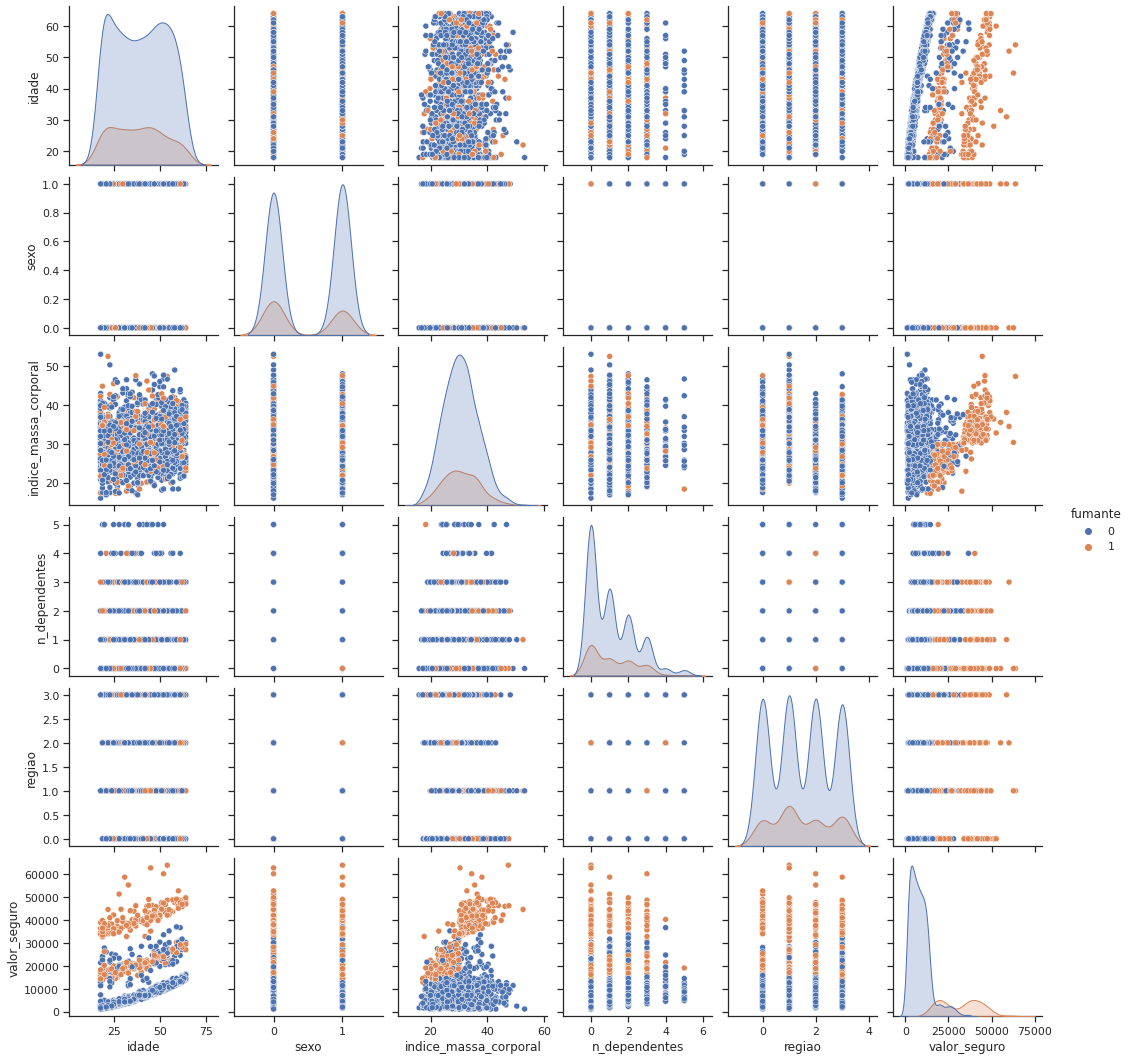

In [155]:
sns.set(style='ticks')
sns.pairplot(ss, hue='fumante')
plt.show()

**Realizando aprendizado com todos os atributos fora o atributo fumante**

In [185]:
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(ss.drop('fumante', axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [186]:
np.set_printoptions(suppress=True)
print(k_means.cluster_centers_.round(3))
ss.groupby('fumante').mean()

[[   38.433     0.51     30.217     1.079     1.485  8364.848]
 [   42.766     0.427    32.714     1.167     1.481 35827.856]]


,idade,sexo,indice_massa_corporal,n_dependentes,regiao,valor_seguro
fumante,,,,,,
0,39.385338,0.514098,30.651795,1.090226,1.483083,8434.268298
1,38.514599,0.419708,30.708449,1.113139,1.489051,32050.231832


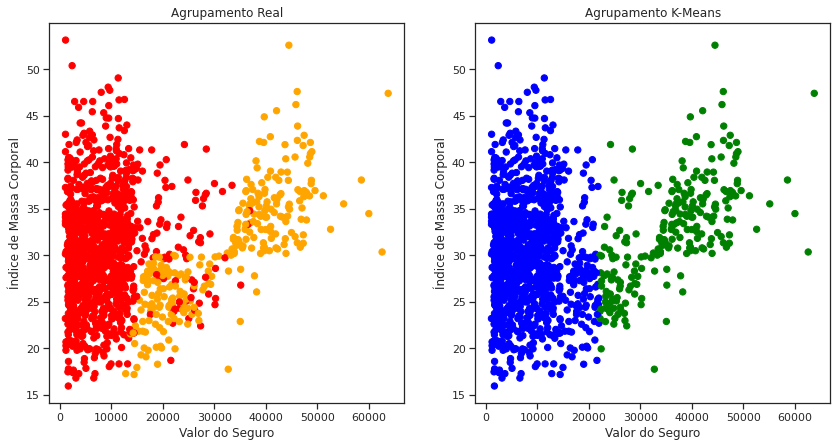

In [187]:
plt.figure(figsize=(14,7))
 
colormap_real = np.array(['red', 'orange'])
colormap_group = np.array(['blue', 'green'])

plt.subplot(1, 2, 1)
plt.scatter(x=ss['valor_seguro'], y=ss['indice_massa_corporal'], c=colormap_real[ss['fumante']], s=40)
plt.title('Agrupamento Real')
plt.xlabel("Valor do Seguro")
plt.ylabel("Índice de Massa Corporal")

plt.subplot(1, 2, 2)
plt.scatter(x=ss['valor_seguro'], y=ss['indice_massa_corporal'], c=colormap_group[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel("Valor do Seguro")
plt.ylabel("Índice de Massa Corporal")

plt.show()

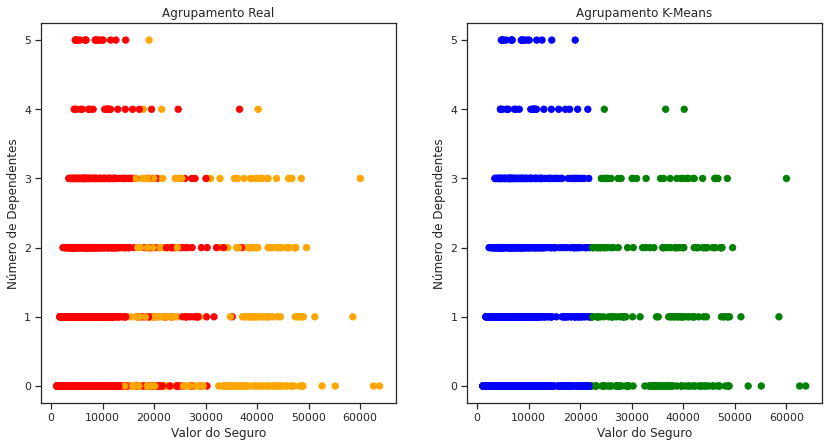

In [188]:
plt.figure(figsize=(14,7))
 
colormap_real = np.array(['red', 'orange'])
colormap_group = np.array(['blue', 'green'])

plt.subplot(1, 2, 1)
plt.scatter(x=ss['valor_seguro'], y=ss['n_dependentes'], c=colormap_real[ss['fumante']], s=40)
plt.title('Agrupamento Real')
plt.xlabel("Valor do Seguro")
plt.ylabel("Número de Dependentes")

plt.subplot(1, 2, 2)
plt.scatter(x=ss['valor_seguro'], y=ss['n_dependentes'], c=colormap_group[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel("Valor do Seguro")
plt.ylabel("Número de Dependentes")

plt.show()

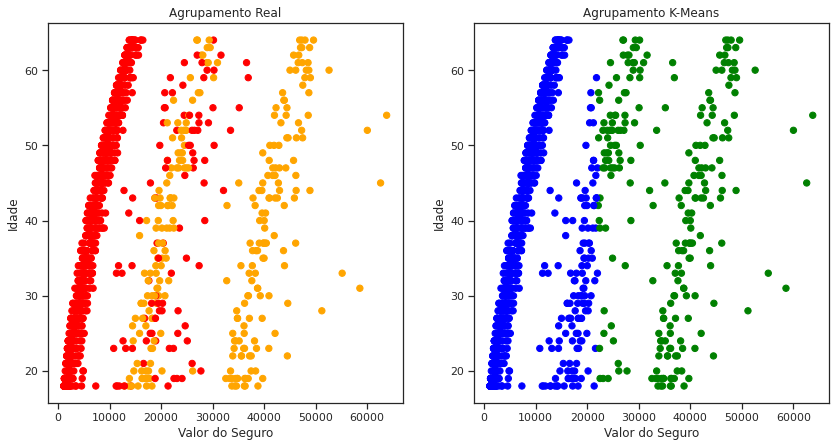

In [189]:
plt.figure(figsize=(14,7))
 
colormap_real = np.array(['red', 'orange'])
colormap_group = np.array(['blue', 'green'])

plt.subplot(1, 2, 1)
plt.scatter(x=ss['valor_seguro'], y=ss['idade'], c=colormap_real[ss['fumante']], s=40)
plt.title('Agrupamento Real')
plt.xlabel("Valor do Seguro")
plt.ylabel("Idade")

plt.subplot(1, 2, 2)
plt.scatter(x=ss['valor_seguro'], y=ss['idade'], c=colormap_group[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel("Valor do Seguro")
plt.ylabel("Idade")

plt.show()

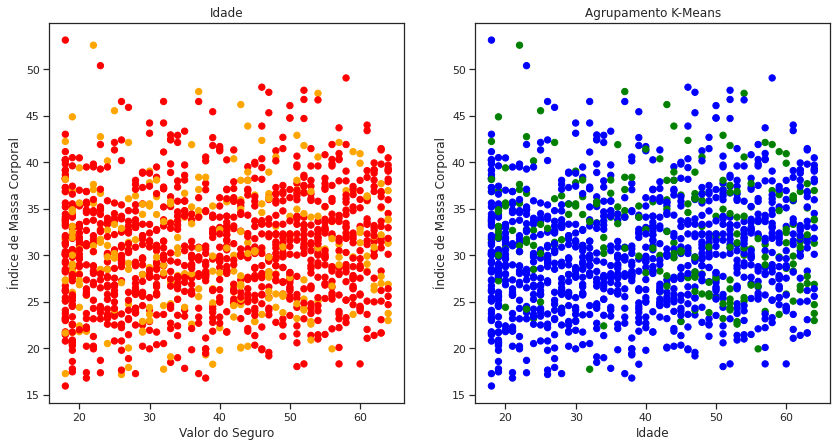

In [190]:
plt.figure(figsize=(14,7))
 
colormap_real = np.array(['red', 'orange'])
colormap_group = np.array(['blue', 'green'])

plt.subplot(1, 2, 1)
plt.scatter(x=ss['idade'], y=ss['indice_massa_corporal'], c=colormap_real[ss['fumante']], s=40)
plt.title('Idade')
plt.xlabel("Valor do Seguro")
plt.ylabel("Índice de Massa Corporal")

plt.subplot(1, 2, 2)
plt.scatter(x=ss['idade'], y=ss['indice_massa_corporal'], c=colormap_group[k_means.labels_], s=40)
plt.title('Agrupamento K-Means')
plt.xlabel("Idade")
plt.ylabel("Índice de Massa Corporal")

plt.show()

In [192]:
k_means = KMeans(n_clusters=2, random_state=1).fit(ss.drop('fumante', axis=1))
labels = k_means.labels_
metrics.silhouette_score(ss, labels, metric='euclidean')

0.7335567664668805

**Resposta parcial:** Com os gráficos apresentados e o cálculo da silhueta, é possível observar que houve um bom ajuste dos dados, sendo que é possível observar uma boa separação das classes tanto pelos gráficos plotados quanto pela silhueta calculada próximo de 1.

**Realizando análise de silhueta com atributos diversos**

In [194]:
ss_f = ss.drop('fumante', axis=1);
ss_f = ss_f.drop('regiao', axis=1);
k_means = KMeans(n_clusters=2, random_state=1).fit(ss_f)
labels = k_means.labels_
metrics.silhouette_score(ss, labels, metric='euclidean')

0.7335567664668805

In [197]:
ss_f = ss.drop('fumante', axis=1);
ss_f = ss_f.drop('valor_seguro', axis=1);
k_means = KMeans(n_clusters=2, random_state=1).fit(ss_f)
labels = k_means.labels_
metrics.silhouette_score(ss, labels, metric='euclidean')

0.1681114066827817

In [202]:
ss_f = ss.drop('fumante', axis=1);
ss_f = ss_f.drop('idade', axis=1);
ss_f = ss_f.drop('sexo', axis=1);
ss_f = ss_f.drop('indice_massa_corporal', axis=1);
ss_f = ss_f.drop('n_dependentes', axis=1);
ss_f = ss_f.drop('regiao', axis=1);
k_means = KMeans(n_clusters=2, random_state=1).fit(ss_f)
labels = k_means.labels_
metrics.silhouette_score(ss, labels, metric='euclidean')

0.7335567664668805

**R:** Realizada uma análise mais ampla de qual atributo exerce maior influência na silhueta, é possível perceber que o algoritmo utilizou apenas o atributo valor_seguro para determinar se a pessoa é fumante ou não, o que evidencia que esses parâmetros estão bastante relacionados, porém evidencia também uma fragilidade desse modelo de aprendizado não supervisionado, que acabou deixando de utilzar os demais atributos para realizar a marcação como fumante ou não fumante. Dessa forma, não fica claro se essa é um bom modelo, uma vez que, apesar do alto score de silhueta, o algoritmo confia em apenas um atributo, que é valor_seguro.